## Support Vector Machines (SVM)

SVM is a *supervised learning* classification and regression algorithm based on transforming the input data and slice them with a straight line (hyper-plane).

The images I found on a [reddit post](https://www.reddit.com/r/MachineLearning/comments/15zrpp/please_explain_support_vector_machines_svm_like_i/) is really clear in explaining the steps.

**Problem:** trying to seperate 2 classes (red and blue) that is not lineary-seperable in the current 2D coordinate (input space).
<img src='http://i.imgur.com/R9967.png' height='300' width='300'/>

**Step 1:** using some kernel function to transform the coordinate to a new feature space. 

The popular ones are [Polynomial, RBF, and Sigmoid kernel](http://www.eric-kim.net/eric-kim-net/posts/1/kernel_trick.html).
<img src='http://i.imgur.com/WuxyO.png' height='400' width='400'/>

**Step 2:** using hyperplane to seperate the 2 classes as best as we could -- meaning by the widest margin. 

The closest data points to the plane are called "support vectors". These points are the foundation of the hyperplane.

<img src=http://docs.opencv.org/2.4/_images/optimal-hyperplane.png height='250' width='250'/>


### Hard vs Soft margin

Hard doesn't allow some "slack" margin-space. Soft allows some slacking of the support vectors, therefore will introduce some mis-classification if the data is noisy. (image from [this blog](http://blog.csdn.net/aspirinvagrant/article/details/40299797))

<img src=http://img.blog.csdn.net/20141020135732546 height='600' width='600' />


## Coding Example

We are going to use SVM to seperate the 2 classes data below, it looks like a circle within another bigger one. A simple kernel should be sufficient for this.

For optimization, the common way is to use [quadratic programming solver](https://en.wikipedia.org/wiki/Quadratic_programming), however this example is so simple that it can be solve in a brute-force way.

...

..

.

In [1]:
import pandas as pd
import numpy as np
from random import randint
from pandas import Series,DataFrame
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import math
%matplotlib inline
plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['font.size'] = 14

Make Random dataset.

Source: http://scikit-learn.org/stable/auto_examples/datasets/plot_random_dataset.html

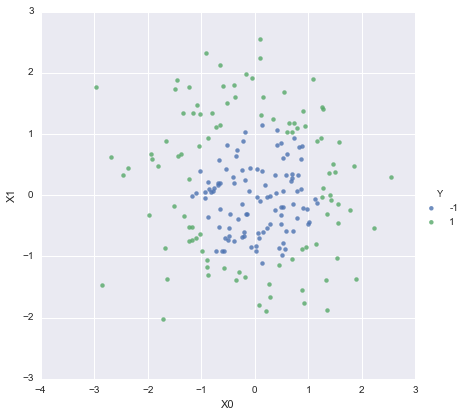

In [2]:
from sklearn.datasets import make_gaussian_quantiles

df = pd.DataFrame(columns=['X0','X1','Y'])
X, Y = make_gaussian_quantiles(n_features=2, n_classes=2,n_samples=200, cov=1.0)
#change Y from [0 or 1] to [-1 or +1]
Y = Y*2 - 1
df['X0'],df['X1'],df['Y'] = X[:, 0],X[:, 1],Y

sns.lmplot(x='X0',y='X1',data=df,hue='Y',fit_reg=False, size=6)

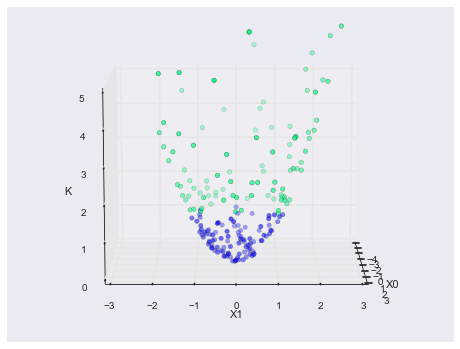

In [3]:
#simple kernel trick
K = X[:, 0]**2 + X[:, 1]**2
df['K'] = K

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.cm as cm
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.view_init(elev=10., azim=0)
ax.scatter(xs=X[:, 0], ys=X[:, 1], zs=K, c=Y, cmap='winter' )
ax.set_zlim([0.0,5.0])

ax.set_xlabel('X0')
ax.set_ylabel('X1')
ax.set_zlabel('K')

plt.show()

### Finding the hyperplane (very simple version)

For this simple case, since K completely seperates the 2 classes of Y, we can find the closest K points to the cutoff -- such that:

$$ w \cdot k_{minus} + b =  -1 $$
$$ w \cdot k_{plus} + b =  +1 $$

We can solve for $w$ and $b$ by

$$ w  = \frac{2}{k_{plus} - k_{minus}} $$
$$ b = 1 - w \cdot k_{plus} $$

In [4]:
# we can seperate them at the middle of K
zipped = zip(K,Y)
zipped.sort(key = lambda t: t[0])

k_minus = zipped[99][0]
k_plus = zipped[100][0]
w = 2.0 / (k_plus - k_minus)
b = 1 - w*k_plus
print 'k_minus = {:.2f}, k_plus = {:.2f}, w = {:.2f}, b = {:.2f}'.format(k_minus,k_plus,w,b)
zipped[95:105]

k_minus = 1.41, k_plus = 1.44, w = 65.87, b = -93.94


[(1.3344980789974197, -1),
 (1.3592242423394016, -1),
 (1.3604700924543205, -1),
 (1.4103811245743447, -1),
 (1.4110501318062532, -1),
 (1.4414148376112319, 1),
 (1.4629012254160461, 1),
 (1.5109198568273576, 1),
 (1.5278989407002703, 1),
 (1.5282923917921378, 1)]

In [15]:
def d_func(f,cutoff=0.5): #threshold function
    #python function always pass obj by ref_name, array is mutable
    return np.where(f>=cutoff,1,-1)

df['Y_prob'] = w*df['K'] + b
df['Y_pred'] = d_func(df['Y_prob'],0.0)

[[100   0]
 [  0 100]]


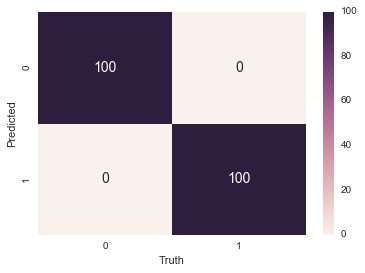

In [17]:
from sklearn.metrics import confusion_matrix
cm_mat = confusion_matrix(df['Y'],df['Y_pred'])
print cm_mat.T
df_temp = pd.DataFrame(cm_mat.flatten()[np.newaxis].T,columns = ['values'])
df_temp = pd.DataFrame(cm_mat.flatten()[np.newaxis].T,columns = ['values'])
plt.figure(figsize = (6,4),dpi=600)
sns.heatmap(cm_mat.T, cbar=True ,annot=True, fmt=',.0f')
plt.xlabel('Truth')
plt.ylabel('Predicted')